In [1]:
import json
import numpy as np
from sklearn.metrics import f1_score
import random as rd

In [2]:
class sentiment:
    Neg="Negative"
    Pos="Positive"

class Review:
    def __init__(self,text,score):
        self.text=text
        self.score=score
        self.sentim=self.get_sentim()
        
    def get_sentim(self):
        if self.score<3:
            return sentiment.Neg
        else:
            return sentiment.Pos
        
class RevCount:
    def __init__(self,reviews):
        self.reviews=reviews
        
    def even_dist(self):
        neg= list(filter(lambda x: x.sentim==sentiment.Neg, self.reviews))
        pos= list(filter(lambda x: x.sentim==sentiment.Pos, self.reviews))
        
        sb=len(neg)
        pos_n=pos[:sb]
        
        self.reviews = pos_n + neg
        rd.shuffle(self.reviews)
        

# Get Data

In [3]:
#abrir os dados no formato .json

reviews=[]
with open('./Data Science/Books_small.json') as f:
    for line in f:
        #print(line)
        review=json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))

len(reviews)

10000

In [4]:
r=reviews[4]
print(r.text,'\n',r.score,'-',r.sentim)

It was a decent read.. typical story line. Nothing unsavory as so many are. Just a slice of life, plausible. 
 3.0 - Positive


# Prep Data

In [5]:
from sklearn.model_selection import train_test_split

#divide grupo de treino e de teste
train,test=train_test_split(reviews, test_size=0.05,random_state=42)


train_x=[x.text for x in train]
train_y=[x.sentim for x in train]

test_x=[x.text for x in test]
test_y=[x.sentim for x in test]


print('From',len(train_y))
print('Pos:',train_y.count(sentiment.Pos))
print('Neg:',train_y.count(sentiment.Neg))

From 9500
Pos: 8880
Neg: 620


In [6]:
#usar essa função para pegar um número igual de exeplos de cada classe
count=RevCount(train)
count.even_dist()

train=count.reviews

train_x=[x.text for x in train]
train_y=[x.sentim for x in train]

test_x=[x.text for x in test]
test_y=[x.sentim for x in test]

print('From',len(train_y))
print('Pos:',train_y.count(sentiment.Pos))
print('Neg:',train_y.count(sentiment.Neg))

From 1240
Pos: 620
Neg: 620


In [7]:
print(train[5].text,'\n',train[5].sentim)

Well written, story flows well.  Another Binchy hit. It's a shame she passed away as we lost a great writer. 
 Positive


# Bag of words vectorization

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

"""O primeiro vetorizador atribui peso igual para todas as palavras
Já o segundo atribui um peso inversamente proporcional á freq da palavra
"""


#Cria uma matriz que conta as instancias de cada palavra
vectorizer = TfidfVectorizer(binary=True)

#o fit ocorre apenas para criar a matriz de contagem (palavras novas nos dados de teste são ignoradas)
train_x_vec=vectorizer.fit_transform(train_x)
test_x_vec=vectorizer.transform(test_x)

In [10]:
print(train_x_vec.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Classification

### Support Vector Machines - Support Vector Classification

In [11]:
from sklearn import svm

#classificador
clf_svm=svm.SVC(kernel='linear')
#treina
clf_svm.fit(train_x_vec,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
r=4
print('Review:\n',test_x[r],'\n Rating:',test_y[r])

print('\n Predict:',clf_svm.predict(test_x_vec[r]))

Review:
 Westlake written, you will be surprised at who is the bad guy, or is he? Story will have you rooting for whoever is eliminating the scrum , off the streets 
 Rating: Positive

 Predict: ['Negative']


In [14]:
#Precisão
print('Precisão:',clf_svm.score(test_x_vec,test_y))

y_pred = clf_svm.predict(test_x_vec)
print("De %d, erra %d" % (test_x_vec.shape[0], (test_y != y_pred).sum()),'\n')

print('Pontuação média de cada avaliação:\n Positivo - Negativo\n',f1_score(test_y,y_pred,average=None,labels=[sentiment.Pos,sentiment.Neg]))

Precisão: 0.778
De 500, erra 111 

Pontuação média de cada avaliação:
 Positivo - Negativo
 [0.86925795 0.26490066]


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier


#classificador
clf_dec=DecisionTreeClassifier()
#treina
clf_dec.fit(train_x_vec,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
r=4
print('Review:\n',test_x[r],'\n Rating:',test_y[r])

print('\n Predict:',clf_dec.predict(test_x_vec[r]))

Review:
 Westlake written, you will be surprised at who is the bad guy, or is he? Story will have you rooting for whoever is eliminating the scrum , off the streets 
 Rating: Positive

 Predict: ['Positive']


In [17]:
#Precisão
print('Precisão:',clf_dec.score(test_x_vec,test_y))

y_pred = clf_dec.predict(test_x_vec)
print("De %d pontos, erra %d" % (test_x_vec.shape[0], (test_y != y_pred).sum()),'\n')

print('Pontuação média de cada avaliação:\n Positivo - Negativo\n',f1_score(test_y,y_pred,average=None,labels=[sentiment.Pos,sentiment.Neg]))

Precisão: 0.644
De 500 pontos, erra 178 

Pontuação média de cada avaliação:
 Positivo - Negativo
 [0.77411168 0.16037736]


### Naive Bayes 

In [18]:
from sklearn.naive_bayes import GaussianNB

#classificador
clf_gnb=DecisionTreeClassifier()
#treina
clf_gnb.fit(train_x_vec,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
r=90
print('Review:\n',test_x[r],'\n Rating:',test_y[r])

print('\n Predict:',clf_dec.predict(test_x_vec[r]))

Review:
 A lot of info packed into this book.  I look forward to doing the diet.  I'll review it again with my results. 
 Rating: Positive

 Predict: ['Positive']


In [20]:
#Precisão
print('Precisão:',clf_gnb.score(test_x_vec,test_y))

y_pred = clf_gnb.predict(test_x_vec)
print("De %d pontos, erra %d" % (test_x_vec.shape[0], (test_y != y_pred).sum()),'\n')

print('Pontuação média de cada avaliação:\n Positivo - Negativo\n',f1_score(test_y,y_pred,average=None,labels=[sentiment.Pos,sentiment.Neg]))

Precisão: 0.65
De 500 pontos, erra 175 

Pontuação média de cada avaliação:
 Positivo - Negativo
 [0.77820025 0.17061611]


### Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression

#classificador
clf_lr=LogisticRegression(max_iter=200)
#treina
clf_lr.fit(train_x_vec,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
r=26
print('Review:\n',test_x[r],'\n Rating:',test_y[r])

print('\n Predict:',clf_lr.predict(test_x_vec[r]))

Review:
 Once again another suspenseful story about the Sullivan family. Couldn't put it down. Loved reading this wonderful love story. Can't wait to read the next book in the series. 
 Rating: Positive

 Predict: ['Positive']


In [23]:
#Precisão
print('Precisão:',clf_lr.score(test_x_vec,test_y))

y_pred = clf_lr.predict(test_x_vec)
print("De %d pontos, erra %d" % (test_x_vec.shape[0], (test_y != y_pred).sum()),'\n')

print('Pontuação média de cada avaliação:\n Positivo - Negativo\n',f1_score(test_y,y_pred,average=None,labels=[sentiment.Pos,sentiment.Neg]))

Precisão: 0.796
De 500 pontos, erra 102 

Pontuação média de cada avaliação:
 Positivo - Negativo
 [0.88084112 0.29166667]


# Avaliação 

In [24]:
#testes individuais
test_set=['its horrible, shove it up your ass','ive seen better','its a super cool book']
new_test=vectorizer.transform(test_set)


print('SVM:',clf_svm.predict(new_test))
print('Dec:',clf_dec.predict(new_test))
print('GNB:',clf_gnb.predict(new_test))
print('Log:',clf_lr.predict(new_test))

SVM: ['Positive' 'Negative' 'Positive']
Dec: ['Positive' 'Positive' 'Positive']
GNB: ['Positive' 'Positive' 'Positive']
Log: ['Negative' 'Negative' 'Positive']


In [26]:
i=0
print('What i think of this:', test_set[i])
if clf_lr.predict(new_test)[i]=="Positive":
    print('\n Glad you liked it!')
else:
    print('\n :(')
    

What i think of this: its horrible, shove it up your ass

 :(


# Tuning (grid search)

In [243]:
from sklearn.model_selection import GridSearchCV

#parametros que queremos variar para buscar melhor performance
parameters={'kernel':('linear', 'rbf'), 'C':(1,4,8,16,32)}

svc = svm.SVC()

#imput é um classificador, parametros, e iterações de 'cross validation'
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(train_x_vec,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
#Precisão
print('Precisão:',clf.score(test_x_vec,test_y))

y_pred = clf.predict(test_x_vec)
print("De %d pontos, erra %d" % (test_x_vec.shape[0], (test_y != y_pred).sum()),'\n')

print('Pontuação média de cada avaliação:\n Positivo - Negativo\n',f1_score(test_y,y_pred,average=None,labels=[sentiment.Pos,sentiment.Neg]))

Precisão: 0.784
De 500 pontos, erra 108 

Pontuação média de cada avaliação:
 Positivo - Negativo
 [0.87294118 0.28      ]


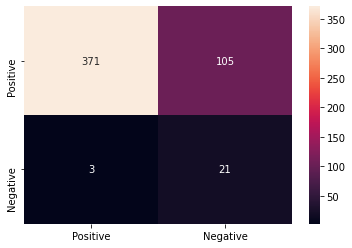

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#Confusion matrix
y_pred = clf.predict(test_x_vec)
labels = [sentiment.Pos,sentiment.Neg]

cm = confusion_matrix(test_y,y_pred,labels=labels)
df_cm = pd.DataFrame(cm,index=labels, columns=labels)

sn.heatmap(df_cm , annot=True, fmt='d')

### Salvar

In [246]:
import pickle

with open('./Data Science/Amazon Review class.pkl','wb') as f:
    pickle.dump(clf,f)

### Carregar 

In [28]:
import pickle
with open('./Data Science/Amazon Review class.pkl','rb') as f:
    clf=pickle.load(f)